# 8.01. webscraping

In [6]:
from IPython.display import Image

In [2]:
ls

8.01_lecture_notebook.ipynb  gnod_2nd_prototype.jpg      lesson.md
case-study-gnod.md           gnod_cluster_algorithm.jpg
gnod_1st_prototype.jpg       ipynb/


# HTML Basics
* **HTML**, hypertext markup language (*What is in the website?*), **THIS IMPORTANT**
    * Head (name of the page, how certain elements interact)
    * body (**IMPORTANT FOR US**)
* **Javascript** (how elements interact, with user interaction)
* **CSS** (how elements look like)

```html
<!DOCTYPE html>
<html>
    <head>
        <title>Page Title</title>
    </head>
    <body>
        <h1>My First Heading</h1>
        <p>My first paragraph.</p>
        <p>My second paragraph has a <b>bold<b> word!</p>
    </body>
</html>

```

https://www.w3schools.com/TAGS/default.ASP

# id's in tags are crucial!


```html
<div id="unique-id" class="some-class">
   jsdgfhfdhgg
   Hello world
</div>

```

id attribute in tags are the best attributes for webscraping!

# DOM tree

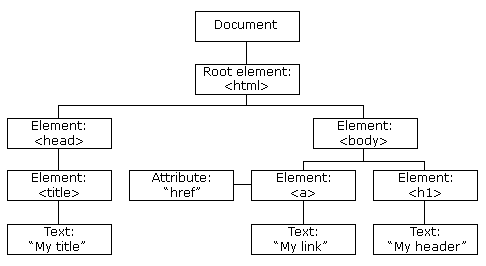

In [7]:
Image("img_htmltree.gif")

# Scraping!

Install **BeautifulSoup** in your conda environment
```bash
conda install -c anaconda beautifulsoup4 
```

In [ ]:
from bs4 import BeautifulSoup

```html

<!DOCTYPE html>
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
</html>


```

In [21]:
html_doc = """
<!DOCTYPE html>
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
</html>
"""

In [62]:
# building the soup with the above html string and the default parsers
soup = BeautifulSoup(html_doc, 'html.parser')

In [61]:
# print the soup in a more "pretty" way
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>



In [28]:
# find out the title of the html code
soup.title

<title>The Dormouse's story</title>

In [29]:
# get the tag name of the title tag
soup.title.name

'title'

In [34]:
# get the actual content of the title tag
soup.title.string

"The Dormouse's story"

In [35]:
# whats the "parent", meaning the tag above?
soup.title.parent

<head><title>The Dormouse's story</title></head>

In [38]:
# get the first (and only the first!) p-tag
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [37]:
# find out the value of the attribute 'class' of that p-tag
soup.p['class']

['title']

In [39]:
# works similar to standard python dictionaries key-value-addressing
my_dict = {'entry': 12030}

In [40]:
my_dict['entry']

12030

In [41]:
# get all p-tags
soup.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [42]:
# get the first element of that list
soup.find_all('p')[0]

<p class="title"><b>The Dormouse's story</b></p>

In [43]:
# find all hyperlinks (a-tags)
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [44]:
# get the first a tag in that list
soup.find_all('a')[0]

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [46]:
# get the first element in that list and get the value of the href attribute -
# which is the actual link
soup.find_all('a')[0].get('href')

'http://example.com/elsie'

In [49]:
# does the same job
soup.find_all('a')[0]['href']

'http://example.com/elsie'

In [50]:
# does not work for getting all the names of the p tags in out html code,
# because the second p tag does not even contain a property called string
[p.string for p in soup.find_all('p')]

["The Dormouse's story", None, '...']

In [55]:
# get all links
for link in soup.find_all('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [58]:
# same with list comprehension
[link.get('href') for link in soup.find_all('a')]

['http://example.com/elsie',
 'http://example.com/lacie',
 'http://example.com/tillie']

In [64]:
# get the raw text version of the html generated content
soup.get_text()

"\n\nThe Dormouse's story\n\nThe Dormouse's story\nOnce upon a time there were three little sisters; and their names were\nElsie,\nLacie and\nTillie;\nand they lived at the bottom of a well.\n...\n\n"

In [60]:
# explaining the \n (line break) in a string
print("hello world\n how are you")

hello world
 how are you
